In [2]:
import pandas as pd
import glob
import os
file='./diffseq/coldata_GAPDHS_counts_wo_badpca_top10_vs_down10_metastatic_from_TCGA.csv'
df=pd.read_csv(file)

In [35]:
!pip install matplotlib --force-reinstall --user

  Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl (7.5 MB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
  Using cached contourpy-1.1.1-cp38-cp38-win_amd64.whl (477 kB)
  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl (14.9 MB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl (36 kB)
  Using cached fonttools-4.57.0-cp38-cp38-win_amd64.whl (1.5 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [36]:
df=df[df['type']!='cell_line']

In [37]:
df.shape

(74, 2)

In [38]:
df.head()

,type,case_submitter_id
TCGA-FS-A1ZE-06A,top10,TCGA-FS-A1ZE
TCGA-D3-A51J-06A,top10,TCGA-D3-A51J
TCGA-D3-A3ML-06A,top10,TCGA-D3-A3ML
TCGA-FW-A3TU-06A,top10,TCGA-FW-A3TU
TCGA-FS-A4F9-06A,down10,TCGA-FS-A4F9


In [39]:
df['case_submitter_id']=df.index
df['case_submitter_id']=df['case_submitter_id'].apply(lambda x:x.split('-06')[0])

In [40]:
df.rename(columns={',"type"': "type"}, inplace=True)

In [41]:
clinical=pd.read_table('clinical.tsv',sep='\t')

In [42]:
clinical.head()

,case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_birth,country_of_residence_at_enrollment,days_to_birth,...,treatment_dose_units,treatment_duration,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_outcome_duration,treatment_type
0,0153f141-625e-4623-9f8a-296678002c63,TCGA-D3-A3ML,TCGA-SKCM,70,'--,'--,'--,'--,'--,-25643,...,'--,'--,'--,'--,'--,'--,yes,'--,'--,"Pharmaceutical Therapy, NOS"
1,0153f141-625e-4623-9f8a-296678002c63,TCGA-D3-A3ML,TCGA-SKCM,70,'--,'--,'--,'--,'--,-25643,...,'--,'--,'--,'--,'--,'--,yes,'--,'--,"Radiation Therapy, NOS"
2,015ba831-106b-4b84-9e8c-243a9eeeebf6,TCGA-EE-A3AF,TCGA-SKCM,48,'--,'--,'--,'--,'--,-17731,...,'--,'--,'--,'--,'--,'--,yes,'--,'--,"Radiation Therapy, NOS"
3,015ba831-106b-4b84-9e8c-243a9eeeebf6,TCGA-EE-A3AF,TCGA-SKCM,48,'--,'--,'--,'--,'--,-17731,...,'--,'--,'--,'--,'--,'--,yes,'--,'--,"Pharmaceutical Therapy, NOS"
4,01ad975d-c2ed-4e4d-bd3b-c9512fc9073c,TCGA-DA-A1I2,TCGA-SKCM,45,'--,'--,'--,'--,'--,-16701,...,'--,'--,'--,'--,'--,'--,no,'--,'--,"Radiation Therapy, NOS"


In [43]:
list(clinical.columns.values)

['case_id',
 'case_submitter_id',
 'project_id',
 'age_at_index',
 'age_is_obfuscated',
 'cause_of_death',
 'cause_of_death_source',
 'country_of_birth',
 'country_of_residence_at_enrollment',
 'days_to_birth',
 'days_to_death',
 'education_level',
 'ethnicity',
 'gender',
 'marital_status',
 'occupation_duration_years',
 'population_group',
 'premature_at_birth',
 'race',
 'vital_status',
 'weeks_gestation_at_birth',
 'year_of_birth',
 'year_of_death',
 'adrenal_hormone',
 'age_at_diagnosis',
 'ajcc_clinical_m',
 'ajcc_clinical_n',
 'ajcc_clinical_stage',
 'ajcc_clinical_t',
 'ajcc_pathologic_m',
 'ajcc_pathologic_n',
 'ajcc_pathologic_stage',
 'ajcc_pathologic_t',
 'ajcc_serum_tumor_markers',
 'ajcc_staging_system_edition',
 'ann_arbor_b_symptoms',
 'ann_arbor_b_symptoms_described',
 'ann_arbor_clinical_stage',
 'ann_arbor_extranodal_involvement',
 'ann_arbor_pathologic_stage',
 'best_overall_response',
 'burkitt_lymphoma_clinical_variant',
 'calgb_risk_group',
 'cancer_detection_met

## Место взятия образца

In [44]:
site_of_biopsy_and_origin=clinical[['case_submitter_id','site_of_resection_or_biopsy','tissue_or_organ_of_origin']]

In [45]:
# Объединение таблиц
merged_df = pd.merge(df, site_of_biopsy_and_origin, on='case_submitter_id', how='left').drop_duplicates()

In [46]:
merged_df.sample(10)

,type,case_submitter_id,site_of_resection_or_biopsy,tissue_or_organ_of_origin
18,top10,TCGA-EE-A29L,Lymph nodes of axilla or arm,"Skin, NOS"
40,down10,TCGA-EE-A2MC,Lymph nodes of axilla or arm,"Skin, NOS"
126,top10,TCGA-FS-A1ZU,"Skin, NOS","Skin, NOS"
52,top10,TCGA-D9-A148,"Lymph node, NOS","Skin, NOS"
60,down10,TCGA-DA-A95Z,"Connective, subcutaneous and other soft tissue...","Skin, NOS"
84,top10,TCGA-EE-A2GR,"Connective, subcutaneous and other soft tissue...","Skin, NOS"
138,top10,TCGA-WE-A8ZY,Skin of trunk,"Skin, NOS"
130,top10,TCGA-GN-A264,Skin of trunk,"Skin, NOS"
32,down10,TCGA-EB-A5VV,Lymph nodes of inguinal region or leg,"Skin, NOS"
140,top10,TCGA-WE-A8JZ,Lymph nodes of inguinal region or leg,"Skin, NOS"


In [47]:
merged_df.shape

(74, 4)

In [48]:
merged_df['site_of_resection_or_biopsy'].unique()

array(['Skin, NOS',
       'Connective, subcutaneous and other soft tissues of pelvis',
       'Lymph nodes of head, face and neck', 'Upper lobe, lung',
       'Lymph node, NOS', 'Lymph nodes of axilla or arm',
       'Connective, subcutaneous and other soft tissues of lower limb and hip',
       'Lymph nodes of inguinal region or leg',
       'Connective, subcutaneous and other soft tissues of upper limb and shoulder',
       'Skin of trunk',
       'Connective, subcutaneous and other soft tissues of trunk, NOS',
       'Lower lobe, lung', 'Abdomen, NOS',
       'Skin of upper limb and shoulder', 'Peritoneum, NOS',
       'Spinal cord', 'Skin of lower limb and hip',
       'Skin of scalp and neck', 'Spleen', 'Frontal lobe',
       'Connective, subcutaneous and other soft tissues, NOS',
       'Connective, subcutaneous and other soft tissues of head, face, and neck',
       'Small intestine, NOS', 'Parotid gland'], dtype=object)

In [49]:
merged_df['tissue_or_organ_of_origin'].unique()

array(['Skin, NOS'], dtype=object)

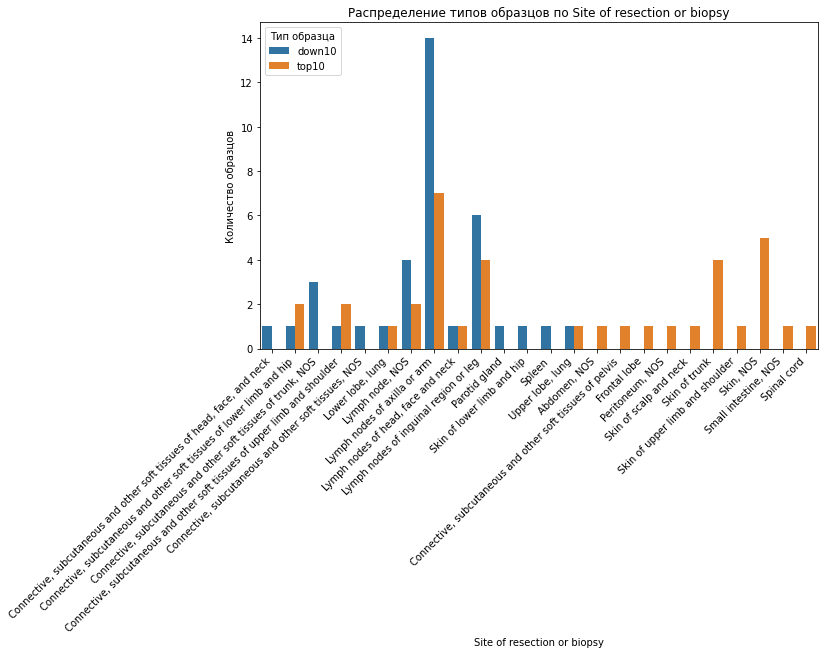

Chi-square test results:
Chi2 statistic: 29.07
P-value: 0.1781
Нет значимой зависимости (p >= 0.05). Type и site_of_resection_or_biopsy независимы.


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


# 1. Построение барплота (stacked)
plt.figure(figsize=(10, 6))
df_plot = merged_df.groupby(["type", "site_of_resection_or_biopsy"]).size().reset_index(name="count")

sns.barplot(
    data=df_plot,
    x="site_of_resection_or_biopsy",
    y="count",
    hue="type",
    estimator=sum
)
plt.xticks(rotation=45, ha='right')
plt.title("Распределение типов образцов по Site of resection or biopsy")
plt.xlabel("Site of resection or biopsy")
plt.ylabel("Количество образцов")
plt.legend(title="Тип образца")
plt.show()

# 2. Статистический тест на зависимость type от mutation
contingency_table = pd.crosstab(merged_df["site_of_resection_or_biopsy"], merged_df["type"])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square test results:")
print(f"Chi2 statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("Зависимость значима (p < 0.05). Type зависит от site_of_resection_or_biopsy.")
else:
    print("Нет значимой зависимости (p >= 0.05). Type и site_of_resection_or_biopsy независимы.")


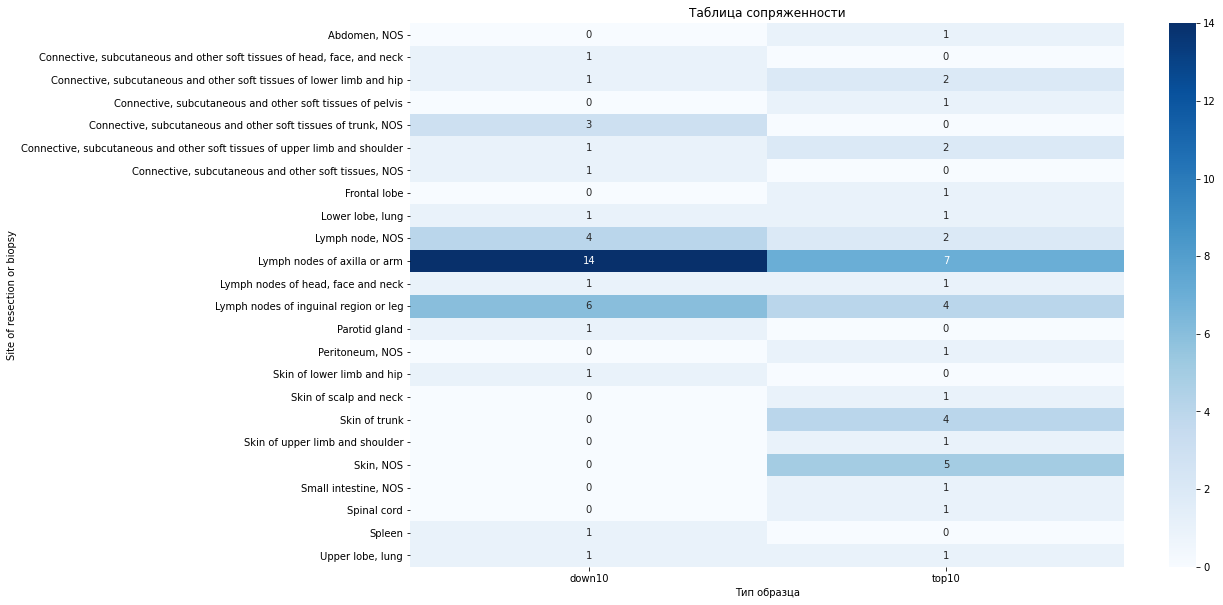

In [51]:

# Визуализация результатов
plt.figure(figsize=(16, 10))
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d")
plt.title("Таблица сопряженности")
plt.xlabel("Тип образца")
plt.ylabel("Site of resection or biopsy")
plt.show()

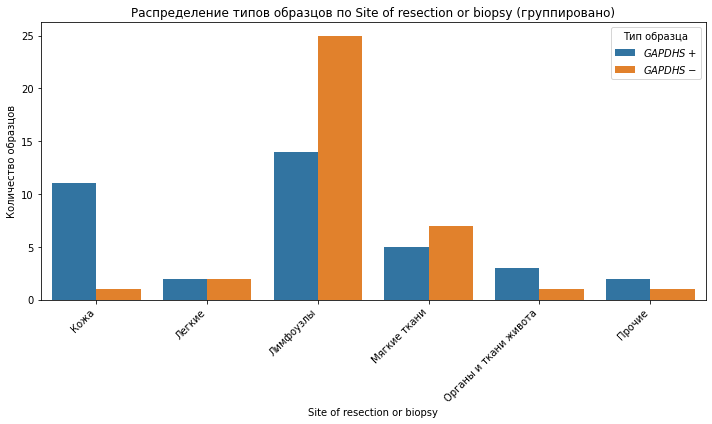

Chi-square test results:
Chi2 statistic: 13.10
P-value: 0.0224
Зависимость значима (p < 0.05). Type зависит от site_grouped.


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# 0. Копируем и создаём новую колонку с объединёнными категориями
merged_df["site_grouped"] = merged_df["site_of_resection_or_biopsy"].copy()
merged_df=merged_df.replace('top10','$\it{GAPDHS+}$').replace('down10','$\it{GAPDHS-}$')

# Объединяем значения в группы
merged_df.loc[merged_df["site_grouped"].str.contains("soft tissue", case=False, na=False), "site_grouped"] = "Мягкие ткани"
merged_df.loc[merged_df["site_grouped"].str.contains("skin", case=False, na=False), "site_grouped"] = "Кожа"
merged_df.loc[merged_df["site_grouped"].str.contains("lymph node", case=False, na=False), "site_grouped"] = "Лимфоузлы"
merged_df.loc[merged_df["site_grouped"].str.contains("lung", case=False, na=False), "site_grouped"] = "Легкие"
# Группа: Органы и ткани живота
abdominal_sites = ['Abdomen, NOS', 'Peritoneum, NOS', 'Spleen', 'Small intestine, NOS']
merged_df.loc[merged_df["site_grouped"].isin(abdominal_sites), "site_grouped"] = "Органы и ткани живота"

# Группа: Прочие специфические локализации
other_specific_sites = ['Spinal cord', 'Frontal lobe', 'Parotid gland']
merged_df.loc[merged_df["site_grouped"].isin(other_specific_sites), "site_grouped"] = "Прочие"


# Остальные можно оставить как есть или добавить группу "Other"
# merged_df["site_grouped"] = merged_df["site_grouped"].where(
#     merged_df["site_grouped"].isin(["Soft tissues", "Skin", "Lymph nodes"]), "Other"
# )

# 1. Построение барплота (stacked)
plt.figure(figsize=(10, 6))
df_plot = merged_df.groupby(["type", "site_grouped"]).size().reset_index(name="count")

sns.barplot(
    data=df_plot,
    x="site_grouped",
    y="count",
    hue="type",
    estimator=sum
)
plt.xticks(rotation=45, ha='right')
plt.title("Распределение типов образцов по Site of resection or biopsy (группировано)")
plt.xlabel("Site of resection or biopsy")
plt.ylabel("Количество образцов")
plt.legend(title="Тип образца")
plt.tight_layout()
plt.show()

# 2. Статистический тест на зависимость type от site_grouped
contingency_table = pd.crosstab(merged_df["site_grouped"], merged_df["type"])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square test results:")
print(f"Chi2 statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("Зависимость значима (p < 0.05). Type зависит от site_grouped.")
else:
    print("Нет значимой зависимости (p >= 0.05). Type и site_grouped независимы.")


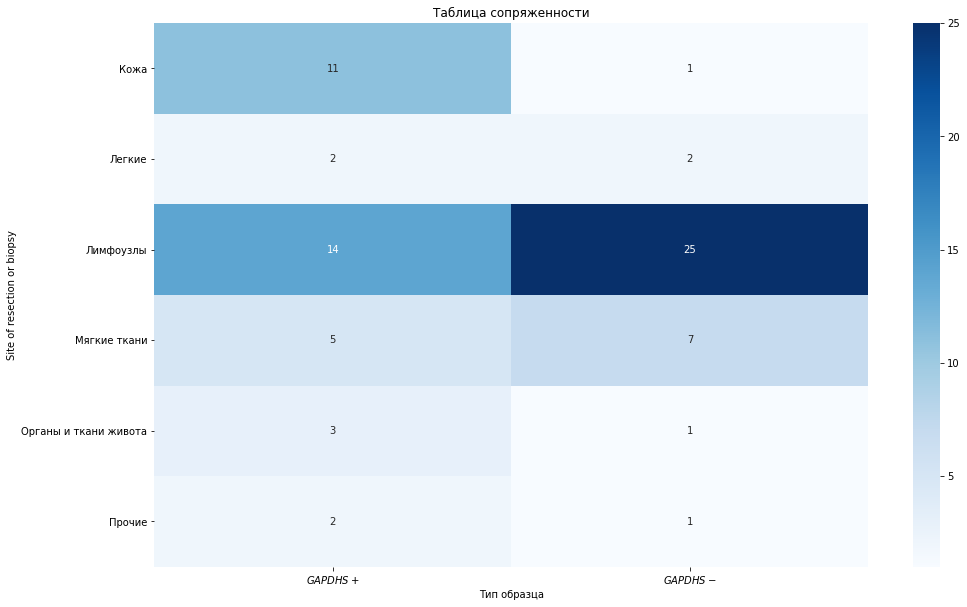

In [53]:

# Визуализация результатов
plt.figure(figsize=(16, 10))
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d")
plt.title("Таблица сопряженности")
plt.xlabel("Тип образца")
plt.ylabel("Site of resection or biopsy")
plt.show()

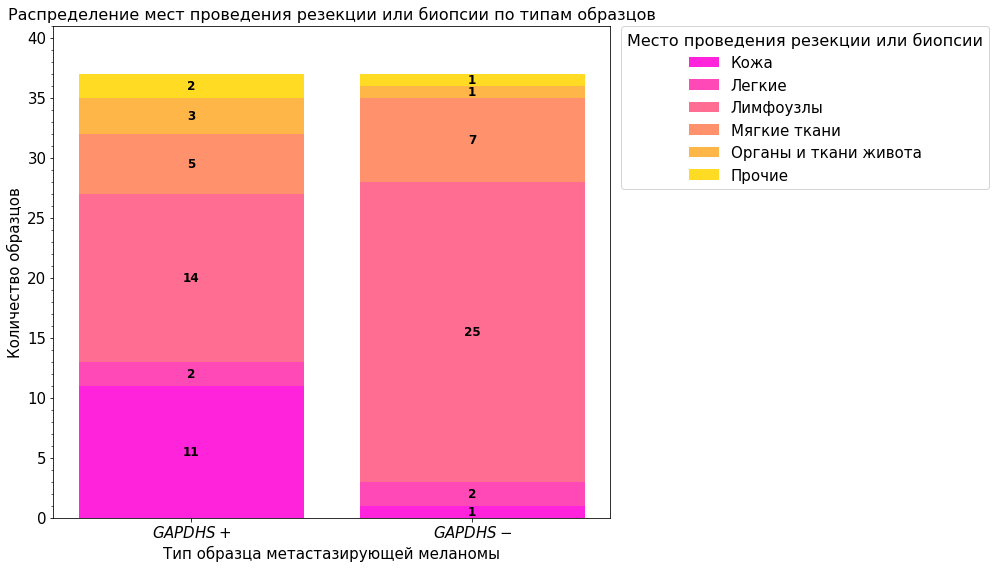

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Группировка данных
df_plot = merged_df.groupby(["type", "site_grouped"]).size().unstack(fill_value=0)

# Сортировка по сумме (опционально)
df_plot = df_plot.loc[df_plot.sum(axis=1).sort_values(ascending=False).index]

# Цвета
colors = sns.color_palette("spring", n_colors=len(df_plot.columns))

# Размер фигуры увеличен
fig, ax = plt.subplots(figsize=(14, 8))

# Построение stacked bar plot
bottom = [0] * len(df_plot)
x = df_plot.index.tolist()

for i, column in enumerate(df_plot.columns):
    values = df_plot[column].tolist()
    bars = ax.bar(x, values, bottom=bottom, color=colors[i], label=column)

    # Подписи значений
    for xi, val, btm in zip(x, values, bottom):
        if val > 0:
            ax.text(
                xi, btm + val / 2, str(int(val)),
                ha='center', va='center', fontsize=12, weight='bold'
            )
    bottom = [btm + val for btm, val in zip(bottom, values)]

# Оформление графика
ax.set_title("Распределение мест проведения резекции или биопсии по типам образцов", fontsize=16)
ax.set_xlabel("Тип образца метастазирующей меланомы", fontsize=15)
ax.set_ylabel("Количество образцов", fontsize=15)
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=0, fontsize=15)

# Настройка оси Y: больше отсечек
max_y = df_plot.sum(axis=1).max()
ax.set_yticks(np.arange(0, max_y+5),minor=True)  # шаг можно настроить

ax.tick_params(axis='y', labelsize=15)

# Легенда сбоку
ax.legend(
    title="Место проведения резекции или биопсии",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    borderaxespad=0.,
    fontsize=15,
    title_fontsize=16
)

plt.tight_layout()
plt.show()


In [55]:
df_plot_=df_plot[df_plot['type'].replace('top10','GAPDHS+')]

KeyError: 'type'

In [56]:
merged_df.replace('top10','$\it{GAPDHS+}$').replace('down10','$\it{GAPDHS-}$')

,type,case_submitter_id,site_of_resection_or_biopsy,tissue_or_organ_of_origin,site_grouped
0,$\it{GAPDHS+}$,TCGA-FS-A1ZE,"Skin, NOS","Skin, NOS",Кожа
2,$\it{GAPDHS+}$,TCGA-D3-A51J,"Connective, subcutaneous and other soft tissue...","Skin, NOS",Мягкие ткани
4,$\it{GAPDHS+}$,TCGA-D3-A3ML,"Lymph nodes of head, face and neck","Skin, NOS",Лимфоузлы
6,$\it{GAPDHS+}$,TCGA-FW-A3TU,"Upper lobe, lung","Skin, NOS",Легкие
8,$\it{GAPDHS-}$,TCGA-FS-A4F9,"Lymph node, NOS","Skin, NOS",Лимфоузлы
...,...,...,...,...,...
138,$\it{GAPDHS+}$,TCGA-WE-A8ZY,Skin of trunk,"Skin, NOS",Кожа
140,$\it{GAPDHS+}$,TCGA-WE-A8JZ,Lymph nodes of inguinal region or leg,"Skin, NOS",Лимфоузлы
142,$\it{GAPDHS-}$,TCGA-GN-A4U9,Lymph nodes of inguinal region or leg,"Skin, NOS",Лимфоузлы
144,$\it{GAPDHS-}$,TCGA-D3-A51G,"Connective, subcutaneous and other soft tissue...","Skin, NOS",Мягкие ткани


## Лечение

In [57]:
treatment=clinical[['case_submitter_id','therapeutic_agents','treatment_or_therapy','treatment_type']]

In [58]:
# Объединение таблиц
merged_df = pd.merge(df, treatment, on='case_submitter_id', how='left').drop_duplicates().replace('top10','$\it{GAPDHS+}$').replace('down10','$\it{GAPDHS-}$')

In [59]:
merged_df.sample(10)

,type,case_submitter_id,therapeutic_agents,treatment_or_therapy,treatment_type
30,$\it{GAPDHS-}$,TCGA-EE-A2M5,'--,yes,"Radiation Therapy, NOS"
122,$\it{GAPDHS-}$,TCGA-ER-A19A,'--,no,"Radiation Therapy, NOS"
129,$\it{GAPDHS-}$,TCGA-EE-A29W,'--,no,"Pharmaceutical Therapy, NOS"
57,$\it{GAPDHS+}$,TCGA-FS-A1ZK,'--,no,"Radiation Therapy, NOS"
61,$\it{GAPDHS-}$,TCGA-DA-A95Z,'--,no,"Radiation Therapy, NOS"
97,$\it{GAPDHS-}$,TCGA-D3-A1Q6,'--,yes,"Pharmaceutical Therapy, NOS"
6,$\it{GAPDHS+}$,TCGA-FW-A3TU,'--,no,"Radiation Therapy, NOS"
60,$\it{GAPDHS-}$,TCGA-DA-A95Z,'--,no,"Pharmaceutical Therapy, NOS"
140,$\it{GAPDHS+}$,TCGA-WE-A8JZ,'--,no,"Radiation Therapy, NOS"
44,$\it{GAPDHS+}$,TCGA-EE-A2A5,'--,yes,"Radiation Therapy, NOS"


In [60]:
merged_df[merged_df['treatment_or_therapy']=='yes']

,type,case_submitter_id,therapeutic_agents,treatment_or_therapy,treatment_type
2,$\it{GAPDHS+}$,TCGA-D3-A51J,'--,yes,"Radiation Therapy, NOS"
3,$\it{GAPDHS+}$,TCGA-D3-A51J,'--,yes,"Pharmaceutical Therapy, NOS"
4,$\it{GAPDHS+}$,TCGA-D3-A3ML,'--,yes,"Pharmaceutical Therapy, NOS"
5,$\it{GAPDHS+}$,TCGA-D3-A3ML,'--,yes,"Radiation Therapy, NOS"
8,$\it{GAPDHS-}$,TCGA-FS-A4F9,'--,yes,"Pharmaceutical Therapy, NOS"
...,...,...,...,...,...
136,$\it{GAPDHS-}$,TCGA-EE-A2MI,'--,yes,"Radiation Therapy, NOS"
141,$\it{GAPDHS+}$,TCGA-WE-A8JZ,'--,yes,"Pharmaceutical Therapy, NOS"
142,$\it{GAPDHS-}$,TCGA-GN-A4U9,'--,yes,"Pharmaceutical Therapy, NOS"
143,$\it{GAPDHS-}$,TCGA-GN-A4U9,'--,yes,"Radiation Therapy, NOS"


In [61]:
merged_df.shape

(148, 5)

In [62]:
clinical['therapeutic_agents'].unique()

array(["'--"], dtype=object)

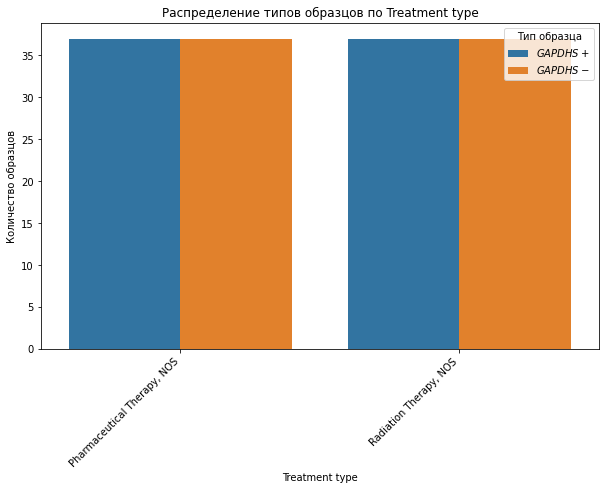

Chi-square test results:
Chi2 statistic: 0.00
P-value: 1.0000
Нет значимой зависимости (p >= 0.05). Type и treatment_type независимы.


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


# 1. Построение барплота (stacked)
plt.figure(figsize=(10, 6))
df_plot = merged_df.groupby(["type", "treatment_type"]).size().reset_index(name="count")

sns.barplot(
    data=df_plot,
    x="treatment_type",
    y="count",
    hue="type",
    estimator=sum
)
plt.xticks(rotation=45, ha='right')
plt.title("Распределение типов образцов по Treatment type")
plt.xlabel("Treatment type")
plt.ylabel("Количество образцов")
plt.legend(title="Тип образца")
plt.show()

# 2. Статистический тест на зависимость type от mutation
contingency_table = pd.crosstab(merged_df["treatment_type"], merged_df["type"])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square test results:")
print(f"Chi2 statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("Зависимость значима (p < 0.05). Type зависит от treatment_type.")
else:
    print("Нет значимой зависимости (p >= 0.05). Type и treatment_type независимы.")


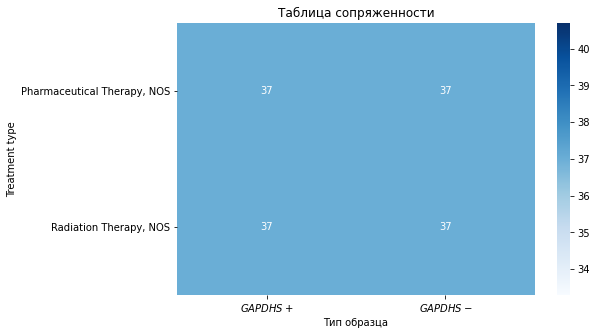

In [64]:

# Визуализация результатов
plt.figure(figsize=(8, 5))
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d")
plt.title("Таблица сопряженности")
plt.xlabel("Тип образца")
plt.ylabel("Treatment type")
plt.show()

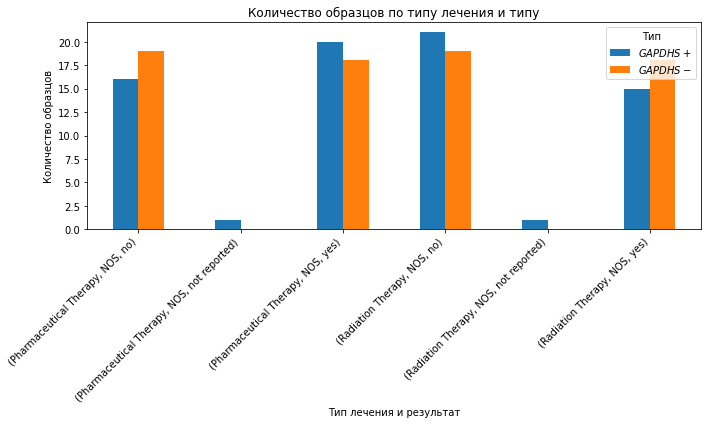

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# (Данные те же, что и в предыдущем примере)

# Группировка данных
grouped = merged_df.groupby(['treatment_type', 'treatment_or_therapy', 'type']).size().unstack()

# Построение графика
grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Количество образцов по типу лечения и типу')
plt.xlabel('Тип лечения и результат')
plt.ylabel('Количество образцов')
plt.xticks(rotation=45, ha='right')  # Поворот подписей оси X для лучшей читаемости
plt.legend(title='Тип')
plt.tight_layout() # предотвращает наложение подписей
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


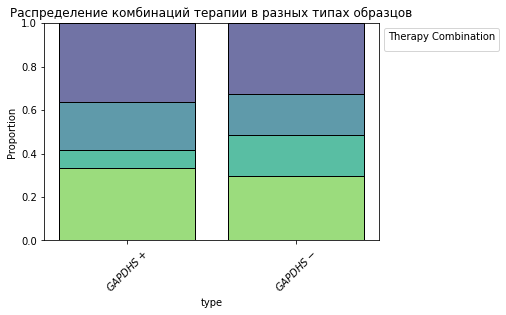

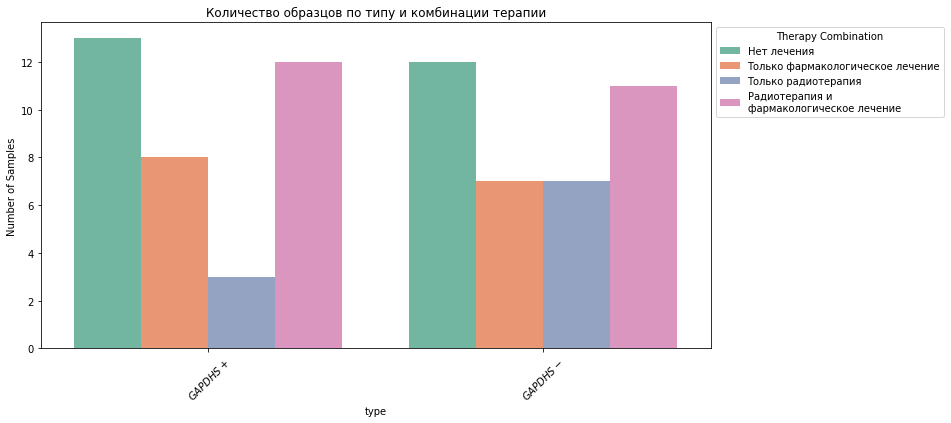

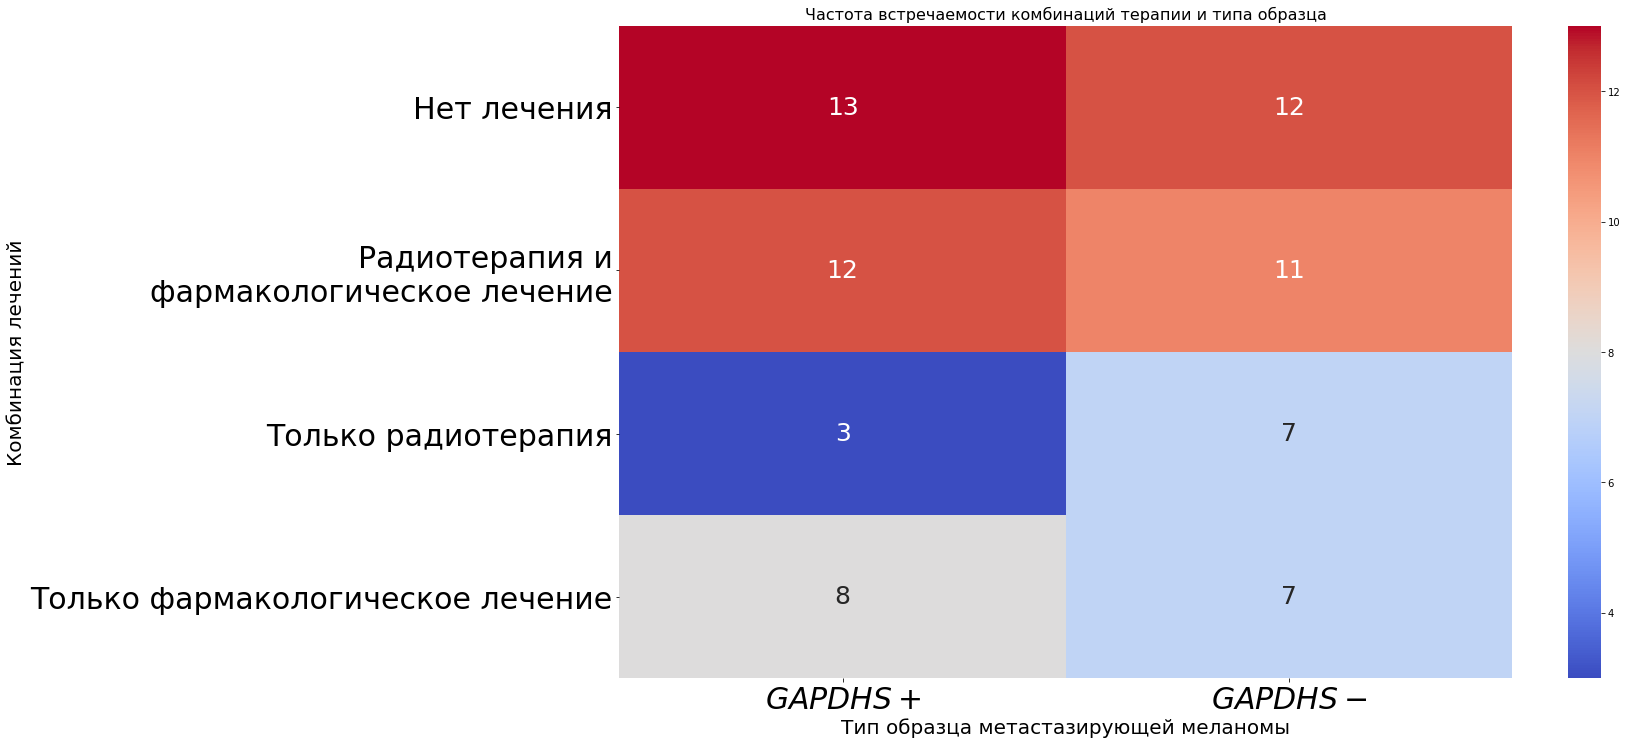

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Группируем данные по каждому образцу, объединяя информацию о терапии
therapy_status = merged_df.pivot_table(
    index=["case_submitter_id", "type"], 
    columns="treatment_type", 
    values="treatment_or_therapy", 
    aggfunc=lambda x: "/".join(sorted(set(x))))

# Сбрасываем multi-index, чтобы получить единый DataFrame
therapy_status.reset_index(inplace=True)

# Создаем новую колонку, отражающую статус лечения
therapy_status["therapy_combination"] = therapy_status.apply(
    lambda row: f"Radiation:{row.get('Radiation Therapy, NOS', 'not reported')}, "
                  f"Pharma:{row.get('Pharmaceutical Therapy, NOS', 'not reported')}", axis=1)

# Группируем по therapy_combination и типу образца
summary = therapy_status.groupby(["therapy_combination", "type"]).size().reset_index(name="count")
summary=summary.replace('Radiation:no, Pharma:no','Нет лечения').replace('Radiation:no, Pharma:yes','Только фармакологическое лечение').replace('Radiation:not reported, Pharma:not reported','Нет данных').replace('Radiation:yes, Pharma:no','Только радиотерапия').replace('Radiation:yes, Pharma:yes','Радиотерапия и\nфармакологическое лечение')
summary=summary[summary['therapy_combination']!='Нет данных']

# Stacked Bar Chart: процентное распределение комбинаций терапии по type
#plt.figure(figsize=(12, 6))
sns.histplot(
    data=summary,
    x="type", hue="therapy_combination", weights="count",
    multiple="fill", shrink=0.8, palette="viridis"
)
plt.ylabel("Proportion")
plt.title("Распределение комбинаций терапии в разных типах образцов")
plt.xticks(rotation=45)
plt.legend(title="Therapy Combination", bbox_to_anchor=(1, 1))
#plt.show()

# Grouped Bar Chart: количество образцов по типу и комбинации терапии
plt.figure(figsize=(12, 6))
sns.barplot(
    data=summary,
    x="type", y="count", hue="therapy_combination", 
    palette="Set2"
)
plt.ylabel("Number of Samples")
plt.title("Количество образцов по типу и комбинации терапии")
plt.xticks(rotation=45)
plt.legend(title="Therapy Combination", bbox_to_anchor=(1, 1))
plt.show()

# Heatmap: частота комбинаций type и therapy_combination
heatmap_data = summary.pivot_table(
    index="therapy_combination", columns="type", values="count", fill_value=0
)
plt.figure(figsize=(20, 12))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt="d", annot_kws={"fontsize":25})
plt.title("Частота встречаемости комбинаций терапии и типа образца", fontsize=16)
plt.xlabel("Тип образца метастазирующей меланомы", fontsize=20)
plt.ylabel("Комбинация лечений", fontsize=20)
plt.xticks(rotation=0, fontsize=30)
plt.yticks(rotation=0, fontsize=30)
plt.show()


In [34]:
# Статистический тест зависимости type от therapy_combination
from scipy.stats import chi2_contingency
contingency_table = summary.pivot(index="therapy_combination", columns="type", values="count").fillna(0)
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square test statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
if p < 0.05:
    print("Зависимость значима (p < 0.05), тип образца зависит от комбинации терапии.")
else:
    print("Зависимость не обнаружена (p >= 0.05), тип образца не зависит от комбинации терапии.")

NameError: name 'summary' is not defined

,therapy_combination,type,count
0,"Radiation:no, Pharma:no",$\it{GAPDHS+}$,13
1,"Radiation:no, Pharma:no",$\it{GAPDHS-}$,12
2,"Radiation:no, Pharma:yes",$\it{GAPDHS+}$,8
3,"Radiation:no, Pharma:yes",$\it{GAPDHS-}$,7
4,"Radiation:not reported, Pharma:not reported",$\it{GAPDHS+}$,1
5,"Radiation:yes, Pharma:no",$\it{GAPDHS+}$,3
6,"Radiation:yes, Pharma:no",$\it{GAPDHS-}$,7
7,"Radiation:yes, Pharma:yes",$\it{GAPDHS+}$,12
8,"Radiation:yes, Pharma:yes",$\it{GAPDHS-}$,11


## days_to_last_follow_up

In [28]:
days=clinical[['case_submitter_id','days_to_last_follow_up']]

In [29]:
# Объединение таблиц
merged_df = pd.merge(df, days, on='case_submitter_id', how='left').drop_duplicates()

In [57]:
merged_df.sample(10)

,type,case_submitter_id,days_to_last_follow_up
132,top10,TCGA-EE-A29H,1966.0
50,down10,TCGA-EE-A2MR,4088.0
86,down10,TCGA-D3-A1QA,2765.0
128,down10,TCGA-EE-A29W,5932.0
56,top10,TCGA-FS-A1ZK,NaN
134,down10,TCGA-GF-A6C9,480.0
24,down10,TCGA-FR-A7U9,571.0
60,down10,TCGA-DA-A95Z,396.0
10,down10,TCGA-YD-A9TA,1496.0
20,top10,TCGA-D3-A2JL,5219.0


In [31]:
merged_df.shape

(74, 3)

In [56]:
import re
def replace_double_dash(x):
    if x == "'--":
        return None
    if x != None:
        return int(x.split('.')[0])

merged_df['days_to_last_follow_up'] = merged_df['days_to_last_follow_up'].apply(replace_double_dash)

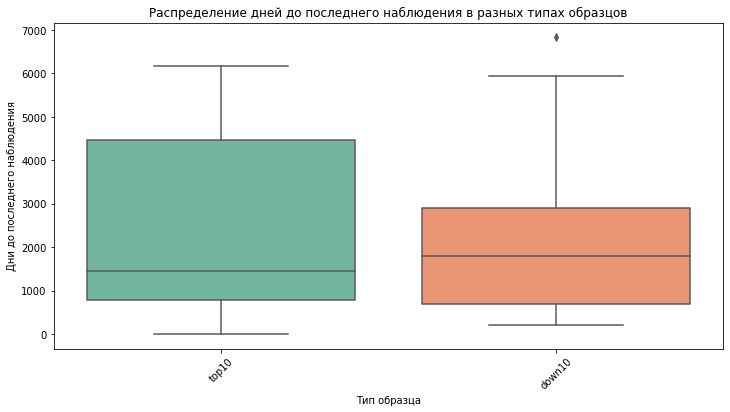

Mann-Whitney U test: статистика = 258.0, p-value = 0.9186169649999252
Статистически значимого различия не обнаружено.


In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Визуализация распределения дней до последнего наблюдения
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='type', y='days_to_last_follow_up', palette='Set2')
plt.title("Распределение дней до последнего наблюдения в разных типах образцов")
plt.xlabel("Тип образца")
plt.ylabel("Дни до последнего наблюдения")
plt.xticks(rotation=45)
plt.show()

# Проверка наличия ровно двух типов для теста Манна-Уитни
types = merged_df['type'].unique()
if len(types) == 2:
    group1 = merged_df[merged_df['type'] == types[0]]['days_to_last_follow_up'].dropna()
    group2 = merged_df[merged_df['type'] == types[1]]['days_to_last_follow_up'].dropna()
    
    stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
    print(f"Mann-Whitney U test: статистика = {stat}, p-value = {p_value}")
    
    if p_value < 0.05:
        print("Различие между группами статистически значимо.")
    else:
        print("Статистически значимого различия не обнаружено.")
else:
    print("Больше двух групп, используйте тест Крускала-Уоллиса.")


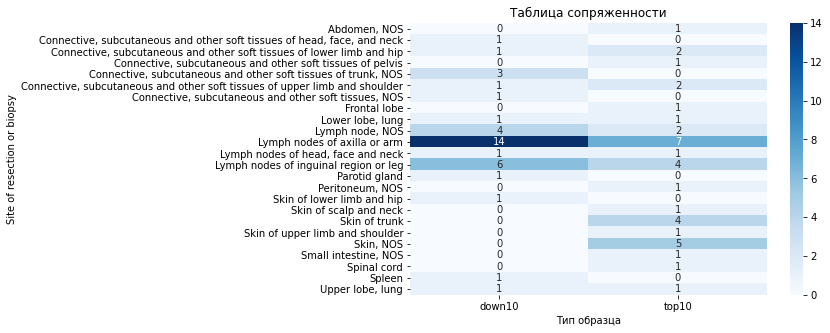

In [65]:

# Визуализация результатов
plt.figure(figsize=(8, 5))
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d")
plt.title("Таблица сопряженности")
plt.xlabel("Тип образца")
plt.ylabel("Site of resection or biopsy")
plt.show()